# tasks W-02

In [121]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None 
import pickle

import os
from importlib import reload

import matplotlib.pyplot as plt
import matplotlib 
# import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
from matplotlib.ticker import MultipleLocator

### load data

In [122]:
df_comp_details = pd.read_csv('duopoly_competition_details.csv')
df_comp_details.fillna(0, inplace=True)
df_comp_details.head(3)

,competition_id,selling_season,selling_period,competitor_id,price_competitor,price,demand,competitor_has_capacity,calculation_duration,errors
0,35gvEP,1,1,WiseGoose,30.0,150.0,0,True,0.0,0.0
1,35gvEP,1,2,WiseGoose,80.0,150.0,0,True,0.0,0.0
2,35gvEP,1,3,WiseGoose,40.0,150.0,0,True,0.0,0.0


## (1) find based on your own competition details CSV the best (max revenue) capacity utilization curve

### (a) compute the revenue for all selling_seasons and competitions

In [123]:
df_comp_details['revenue'] =  df_comp_details['price'] * df_comp_details['demand']
df_comp_details['revenue'].describe()


count    60000.000000
mean         2.636000
std         17.846479
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        320.000000
Name: revenue, dtype: float64

In [124]:
df_comp_details['unique_selling_season_key'] = df_comp_details.apply(lambda r:
                                "%s_%s" % (r.competition_id,r.selling_season), axis=1)
df_comp_details['unique_selling_season_key'].nunique()

600

In [125]:
dfx_rev = df_comp_details.groupby('unique_selling_season_key').agg({
    'revenue' : 'sum'
}).reset_index()
dfx_rev.head()

,unique_selling_season_key,revenue
0,35gvEP_1,0.0
1,35gvEP_10,0.0
2,35gvEP_100,0.0
3,35gvEP_11,0.0
4,35gvEP_12,0.0


array([[<Axes: title={'center': 'revenue'}>]], dtype=object)

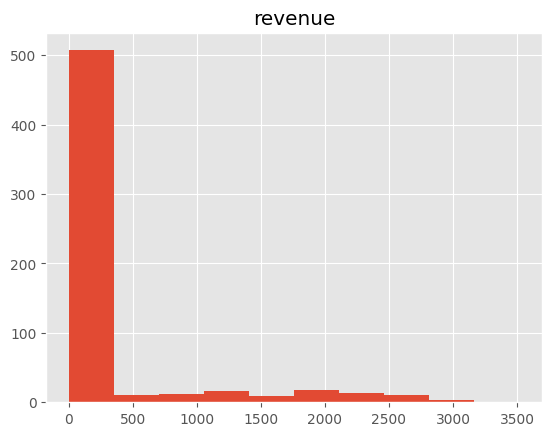

In [126]:
dfx_rev.hist()

In [127]:
dfx_rev.describe()

,revenue
count,600.000000
mean,263.600000
std,675.610185
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3520.000000


### get the selling season keys with the top 20% revenue generation

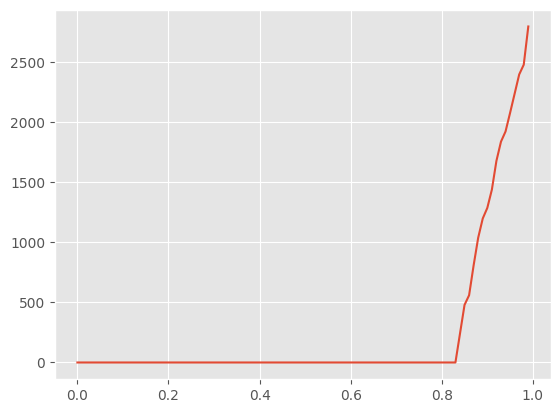

In [128]:
import numpy as np
dfx_rev['revenue'].quantile(0.9)
x = np.arange(0,1,0.01)
plt.plot(x , dfx_rev['revenue'].quantile(x))


In [129]:
top_selling_seasons = dfx_rev[dfx_rev['revenue'] >= dfx_rev['revenue'].quantile(0.95) ].unique_selling_season_key.unique()

print(top_selling_seasons)

['DJzqdu_10' 'DJzqdu_11' 'DJzqdu_14' 'DJzqdu_16' 'DJzqdu_22' 'DJzqdu_23'
 'DJzqdu_25' 'DJzqdu_29' 'DJzqdu_39' 'DJzqdu_40' 'DJzqdu_42' 'DJzqdu_44'
 'DJzqdu_48' 'DJzqdu_51' 'DJzqdu_56' 'DJzqdu_58' 'DJzqdu_59' 'DJzqdu_6'
 'DJzqdu_61' 'DJzqdu_62' 'DJzqdu_65' 'DJzqdu_66' 'DJzqdu_7' 'DJzqdu_75'
 'DJzqdu_76' 'DJzqdu_77' 'DJzqdu_82' 'DJzqdu_83' 'DJzqdu_84' 'DJzqdu_87'
 'DJzqdu_91' 'DJzqdu_94' 'DJzqdu_95' 'DJzqdu_98']


In [130]:
# quick double check
dfx_rev[dfx_rev.unique_selling_season_key.isin(top_selling_seasons)].revenue.mean()

2482.3529411764707

### (b) compute the capacity utilization curves per selling season

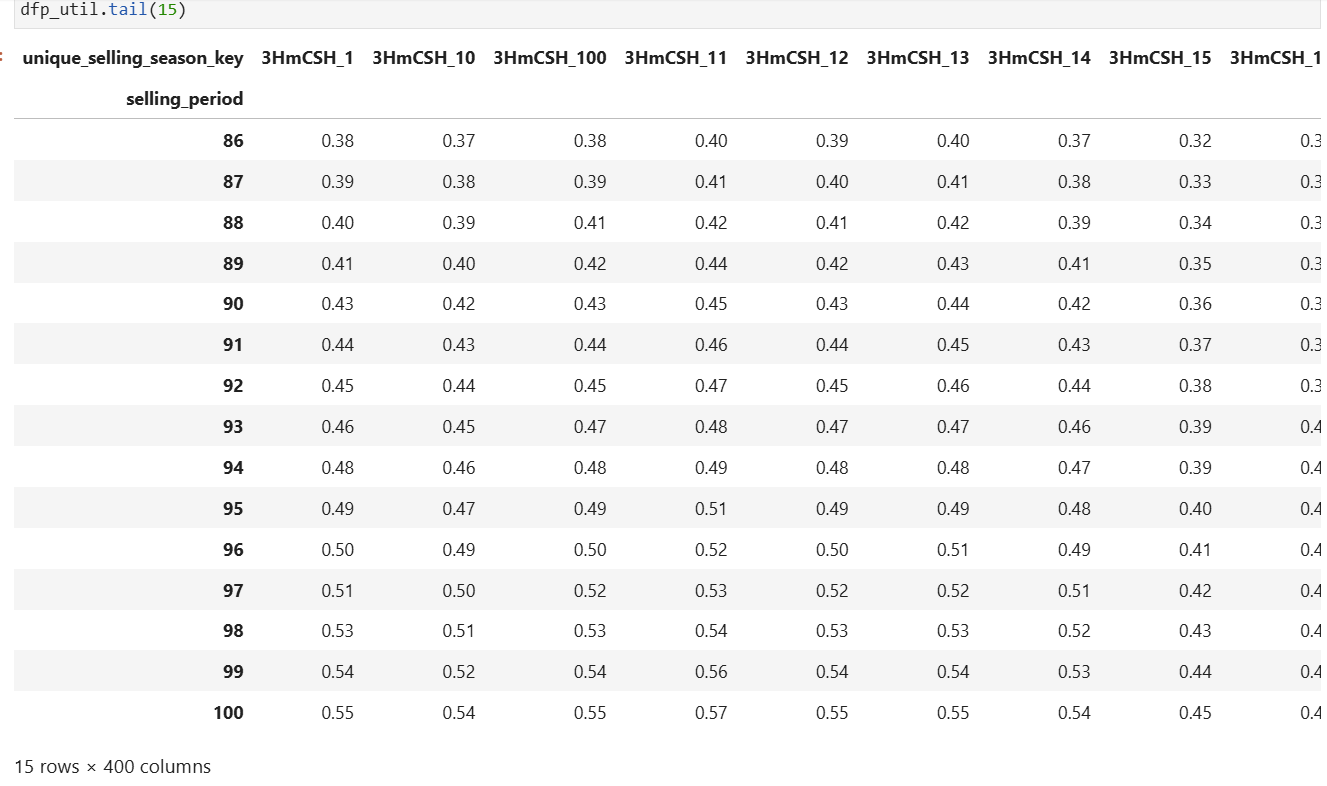

In [131]:
dfp_util = pd.pivot_table(df_comp_details, 
                        values='demand',
                        index = ['selling_period'],
                        columns=['unique_selling_season_key'],
                        aggfunc=np.mean,
                        
)
  
dfp_util.tail()

C:\Users\yannl\AppData\Local\Temp\ipykernel_37232\3999417997.py:1: FutureWarning: The provided callable <function mean at 0x000001D7F9DEF0D0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  dfp_util = pd.pivot_table(df_comp_details,


unique_selling_season_key,35gvEP_1,35gvEP_10,35gvEP_100,35gvEP_11,35gvEP_12,35gvEP_13,35gvEP_14,35gvEP_15,35gvEP_16,35gvEP_17,...,DJzqdu_90,DJzqdu_91,DJzqdu_92,DJzqdu_93,DJzqdu_94,DJzqdu_95,DJzqdu_96,DJzqdu_97,DJzqdu_98,DJzqdu_99
selling_period,,,,,,,,,,,,,,,,,,,,,
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### compute the utilization fractions

In [132]:
for c in dfp_util.columns:
    dfp_util[c] = dfp_util[c].cumsum()
    dfp_util[c] = round(dfp_util[c] / 80, 2)
    
dfp_util.tail(15)

unique_selling_season_key,35gvEP_1,35gvEP_10,35gvEP_100,35gvEP_11,35gvEP_12,35gvEP_13,35gvEP_14,35gvEP_15,35gvEP_16,35gvEP_17,...,DJzqdu_90,DJzqdu_91,DJzqdu_92,DJzqdu_93,DJzqdu_94,DJzqdu_95,DJzqdu_96,DJzqdu_97,DJzqdu_98,DJzqdu_99
selling_period,,,,,,,,,,,,,,,,,,,,,
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.12,0.25,0.11,0.20,0.20,0.21,0.01,0.11,0.38,0.18
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.14,0.28,0.11,0.21,0.21,0.22,0.04,0.11,0.38,0.19
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.14,0.28,0.11,0.22,0.21,0.24,0.05,0.11,0.40,0.19
89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.14,0.28,0.14,0.24,0.21,0.24,0.08,0.11,0.41,0.20
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.14,0.30,0.14,0.25,0.22,0.24,0.08,0.11,0.41,0.20
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.15,0.30,0.15,0.25,0.22,0.25,0.09,0.11,0.41,0.21
92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.16,0.30,0.15,0.25,0.26,0.25,0.11,0.12,0.41,0.21
93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.16,0.30,0.15,0.26,0.29,0.28,0.12,0.12,0.42,0.21
94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.16,0.30,0.15,0.26,0.31,0.28,0.12,0.14,0.44,0.22


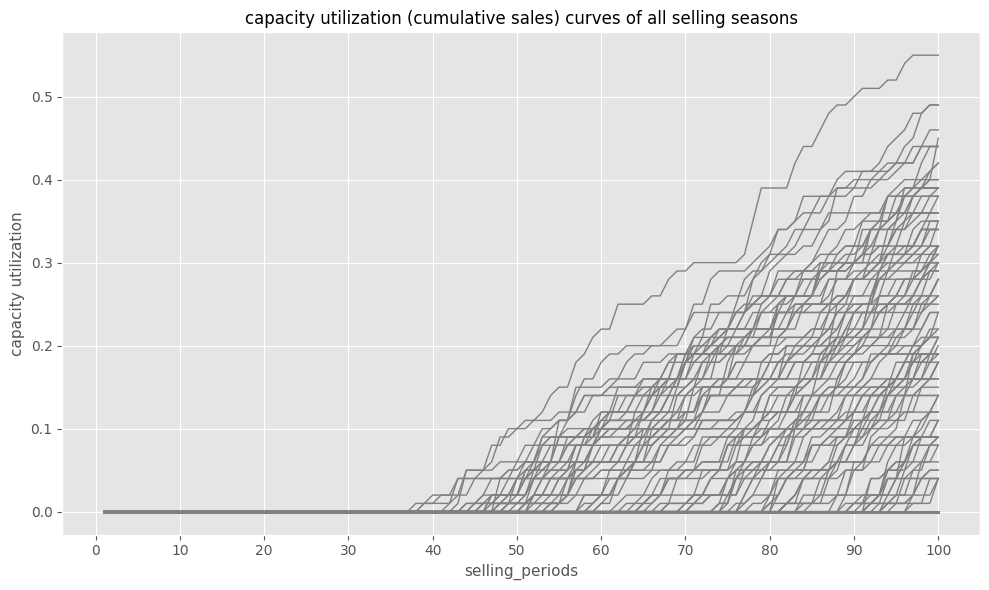

In [133]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(dfp_util.index, dfp_util, color='grey', 
        linestyle='-', linewidth=1, )
ax.set_xlabel('selling_periods', size=11)
# ax.set_xticks(np.arange(min(dft.index), max(dft.index)+1, 1.0))
ax.set_ylabel("capacity utilization" , size=11)

y_majorLocator = MultipleLocator(0.1)
ax.yaxis.set_major_locator(y_majorLocator)
x_majorLocator = MultipleLocator(10)
ax.xaxis.set_major_locator(x_majorLocator)

ax.set_title("capacity utilization (cumulative sales) curves of all selling seasons", size=12)
# ax.legend(loc=0)

ax.grid(True)
fig.tight_layout()

plt.show()

### show only the top revenue curves

In [134]:
dfp_top_curves = dfp_util[dfp_util.columns.intersection(top_selling_seasons)]
dfp_top_curves.shape

(100, 34)

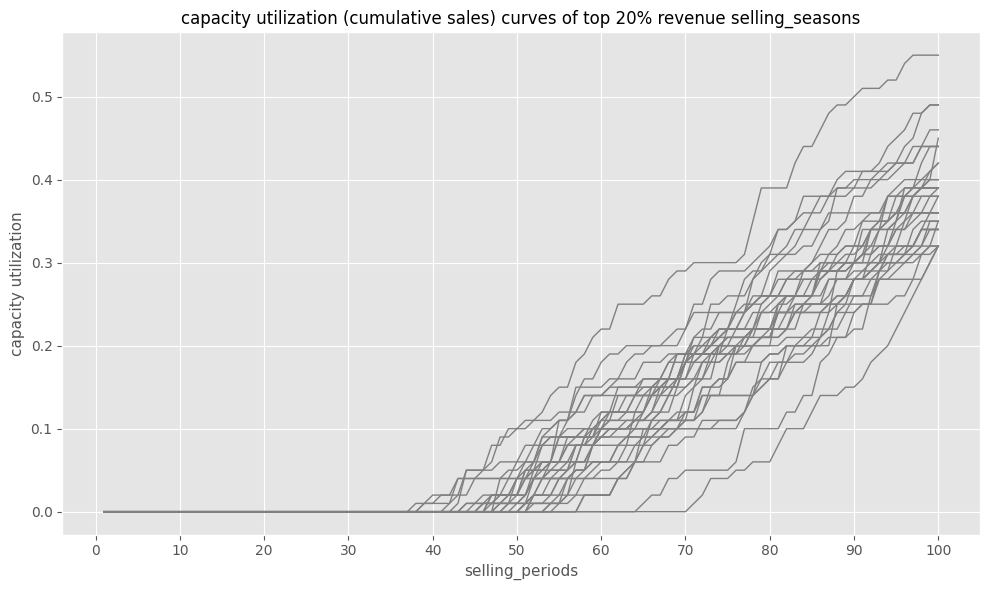

In [135]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(dfp_top_curves.index, dfp_top_curves, color='grey', 
        linestyle='-', linewidth=1, )
ax.set_xlabel('selling_periods', size=11)
# ax.set_xticks(np.arange(min(dft.index), max(dft.index)+1, 1.0))
ax.set_ylabel("capacity utilization" , size=11)

y_majorLocator = MultipleLocator(0.1)
ax.yaxis.set_major_locator(y_majorLocator)
x_majorLocator = MultipleLocator(10)
ax.xaxis.set_major_locator(x_majorLocator)

ax.set_title("capacity utilization (cumulative sales) curves of top 20% revenue selling_seasons", size=12)
# ax.legend(loc=0)

ax.grid(True)
fig.tight_layout()

plt.show()

#### get the mean curve of the top revenue generating ones

<Axes: xlabel='selling_period'>

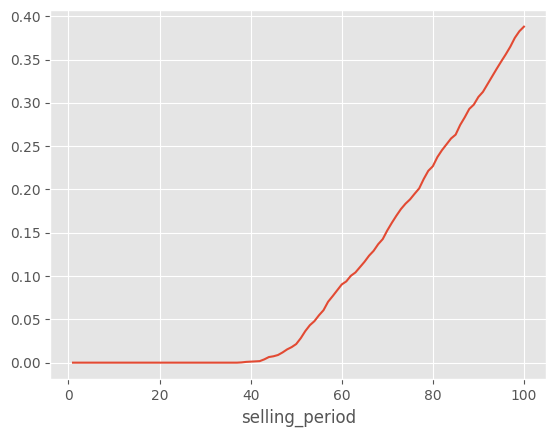

In [136]:
dfp_top_curves['mean_curve'] = dfp_top_curves.mean(axis=1)
dfp_top_curves['mean_curve'].plot()



#### generate dict to describe the cruve at every 5th selling period in the selling season

=== Courbe de ventes cible ===
Période (t) Capacité utilisée (%)    Sièges vendus  
-------------------------------------------------------
5           0.0                      0              
10          0.0                      0              
15          0.0                      0              
20          0.0                      0              
25          0.0                      0              
30          0.0                      0              
35          0.0                      0              
40          0.0                      0              
45          0.01                     0              
50          0.02                     1              
55          0.05                     4              
60          0.09                     7              
65          0.12                     9              
70          0.15                     12             
75          0.19                     15             
80          0.23                     18             
85          

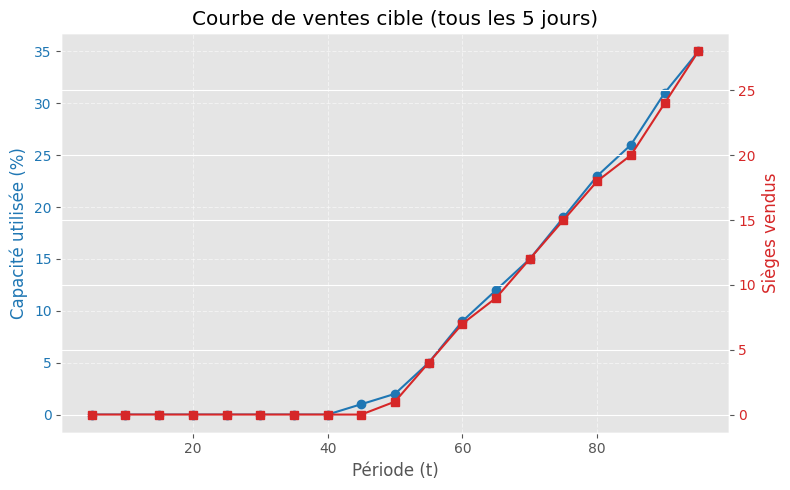

In [137]:
target_sales_curve = {}

for t in range(5, df_comp_details.selling_period.max(), 5):
    target = {}
    target['cap_util'] = round(dfp_top_curves.loc[t, 'mean_curve'], 2)
    target['sold_seats'] = int(target['cap_util'] * 80)  # 80 seats total
    target_sales_curve[t] = target


# --- Affichage tableau formaté --- #
print("=== Courbe de ventes cible ===")
print(f"{'Période (t)':<12}{'Capacité utilisée (%)':<25}{'Sièges vendus':<15}")
print("-" * 55)

for t in target_sales_curve.keys():
    cap = target_sales_curve[t]['cap_util']
    sold = target_sales_curve[t]['sold_seats']
    print(f"{t:<12}{cap:<25}{sold:<15}")

# --- Préparation des données pour le plot --- #
t_values = list(target_sales_curve.keys())
cap_values = [target_sales_curve[t]['cap_util'] * 100 for t in t_values]  # en %
sold_values = [target_sales_curve[t]['sold_seats'] for t in t_values]

# --- Création du graphique --- #
fig, ax1 = plt.subplots(figsize=(8, 5))

color = 'tab:blue'
ax1.set_xlabel('Période (t)')
ax1.set_ylabel('Capacité utilisée (%)', color=color)
ax1.plot(t_values, cap_values, color=color, marker='o', label='Capacité utilisée (%)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linestyle='--', alpha=0.5)

# Axe secondaire pour le nombre de sièges vendus
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Sièges vendus', color=color)
ax2.plot(t_values, sold_values, color=color, marker='s', label='Sièges vendus')
ax2.tick_params(axis='y', labelcolor=color)

# --- Titre et légendes --- #
plt.title("Courbe de ventes cible (tous les 5 jours)")
fig.tight_layout()
plt.show()

In [138]:
with open('target_sales_curve.pkl', "wb") as f:
    pickle.dump(target_sales_curve, f, protocol=pickle.HIGHEST_PROTOCOL)

## (2) implement the logic to follow this capacity utilization curve by controlling the price to stay close to the curve 

## price up -> slow down sales 
## price down -> increase sales

#### prepare given demand input for given competition and given selling season

In [139]:
with open('target_sales_curve.pkl', 'rb') as f:
            target_curve = pickle.load(f)
target_curve

{5: {'cap_util': 0.0, 'sold_seats': 0},
 10: {'cap_util': 0.0, 'sold_seats': 0},
 15: {'cap_util': 0.0, 'sold_seats': 0},
 20: {'cap_util': 0.0, 'sold_seats': 0},
 25: {'cap_util': 0.0, 'sold_seats': 0},
 30: {'cap_util': 0.0, 'sold_seats': 0},
 35: {'cap_util': 0.0, 'sold_seats': 0},
 40: {'cap_util': 0.0, 'sold_seats': 0},
 45: {'cap_util': 0.01, 'sold_seats': 0},
 50: {'cap_util': 0.02, 'sold_seats': 1},
 55: {'cap_util': 0.05, 'sold_seats': 4},
 60: {'cap_util': 0.09, 'sold_seats': 7},
 65: {'cap_util': 0.12, 'sold_seats': 9},
 70: {'cap_util': 0.15, 'sold_seats': 12},
 75: {'cap_util': 0.19, 'sold_seats': 15},
 80: {'cap_util': 0.23, 'sold_seats': 18},
 85: {'cap_util': 0.26, 'sold_seats': 20},
 90: {'cap_util': 0.31, 'sold_seats': 24},
 95: {'cap_util': 0.35, 'sold_seats': 28}}

### load varriables as given in the duopoly p() function from our input data

In [140]:
# take first selling season
id = df_comp_details['unique_selling_season_key'].unique()[0]
df_select = df_comp_details[df_comp_details.unique_selling_season_key==id]

# define selling period
selling_period_in_current_season = 31

In [141]:
# get according deman object
demand_historical_in_current_season  = np.array(
            df_select[df_select.selling_period < selling_period_in_current_season]['demand']
)
demand_historical_in_current_season

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [142]:
# get according price object
prices_historical_in_current_season = [ 
    df_select[df_select.selling_period < selling_period_in_current_season]['price'], 
    df_select[df_select.selling_period < selling_period_in_current_season]['price_competitor'] ]
prices_historical_in_current_season  = np.array(prices_historical_in_current_season)

prices_historical_in_current_season

array([[150. , 150. , 150. , 150. , 150. , 150. , 150. , 150. , 150. ,
        150. , 150. , 150. , 150. , 150. , 150. , 150. , 150. , 150. ,
        150. , 150. , 150. , 150. , 150. , 150. , 150. , 150. , 150. ,
        150. , 150. , 150. ],
       [ 30. ,  80. ,  40. ,  90. ,  89.7,  89.4,  89.1,  88.8,  88.4,
         88.1,  87.8,  87.5,  87.2,  86.8,  86.5,  86.2,  85.8,  85.5,
         85.1,  84.8,  84.4,  84.1,  83.7,  83.4,  83. ,  82.6,  82.3,
         81.9,  81.5,  81.1]])

### logic

In [143]:
last_price = prices_historical_in_current_season[0][-1]
last_price

150.0

In [144]:
current_sold_seats = demand_historical_in_current_season.sum()
current_sold_seats

0

In [158]:
print("old price: %.2f" % 150)
print(selling_period_in_current_season)
selling_period_in_current_season = 85
print(target_curve.keys())
if selling_period_in_current_season in target_curve.keys():
    
    target = target_curve[selling_period_in_current_season]
    target_sales = target['sold_seats']
    
    print("sold seats: %d " % current_sold_seats)
    print("target sold seats: %d " % target_sales)
    
    delta_in_sales =   current_sold_seats/target_sales - 1 
    print("percentage delta to target: %.2f" % delta_in_sales)
    
    ###
    # adjust price according to the delta
    price =  (delta_in_sales +1) * last_price 
    print("new price: %.2f" % price)
    

old price: 150.00
65
dict_keys([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95])
sold seats: 0 
target sold seats: 20 
percentage delta to target: -1.00
new price: 0.00
